In [92]:
# Importing the libraries
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

In [3]:
# Importing the dataset
df = pd.read_csv('/content/flight data.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df_test = pd.read_csv('/content/flight test.csv')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
df_test.shape

(2671, 10)

In [7]:
# Feature Engineering - combining both the datasets
df_final = df.append(df_test, sort=False)
df_final.tail()

<ipython-input-7-227fa90ea12f>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df.append(df_test, sort=False)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [8]:
df_final.shape

(13354, 11)

In [9]:
# Exploratory data analysis
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

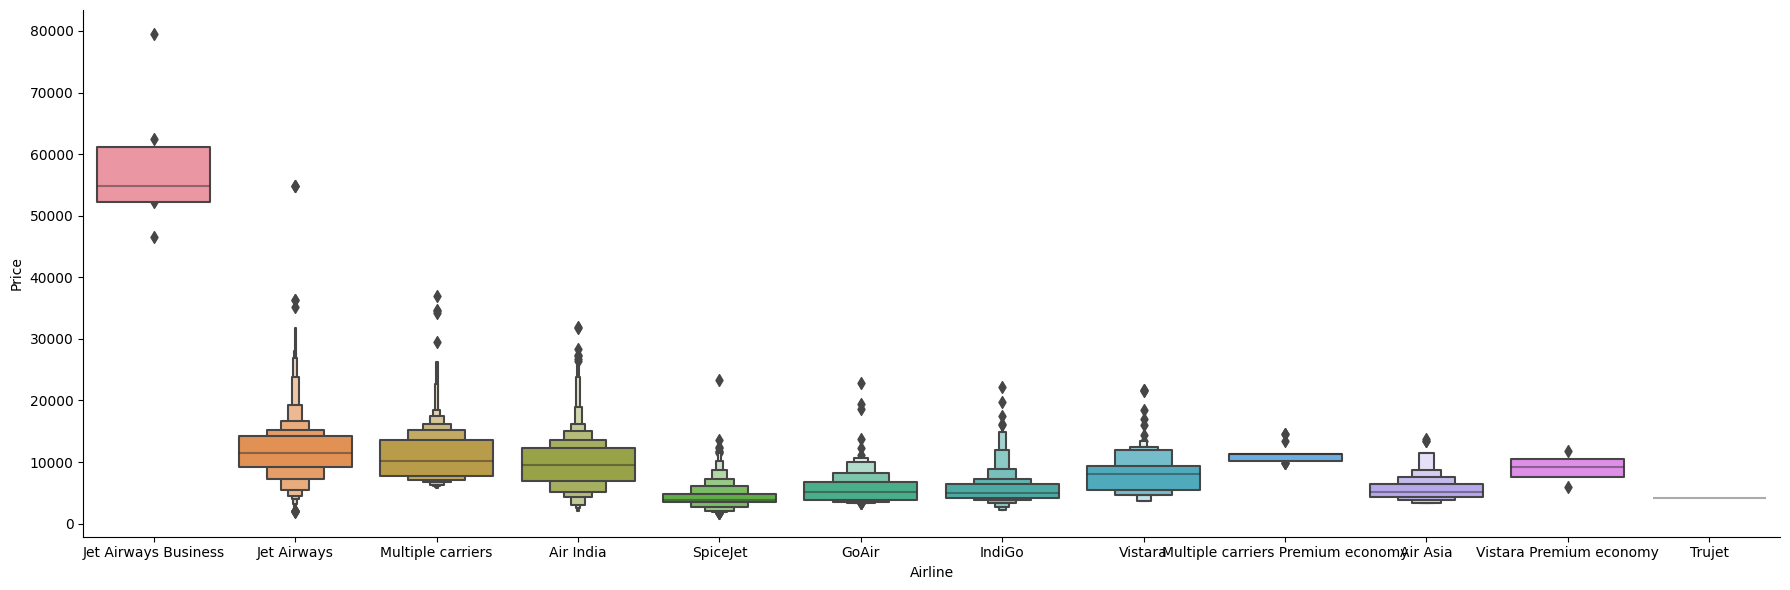

In [10]:
sns.catplot(y='Price', x='Airline',data=df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [11]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

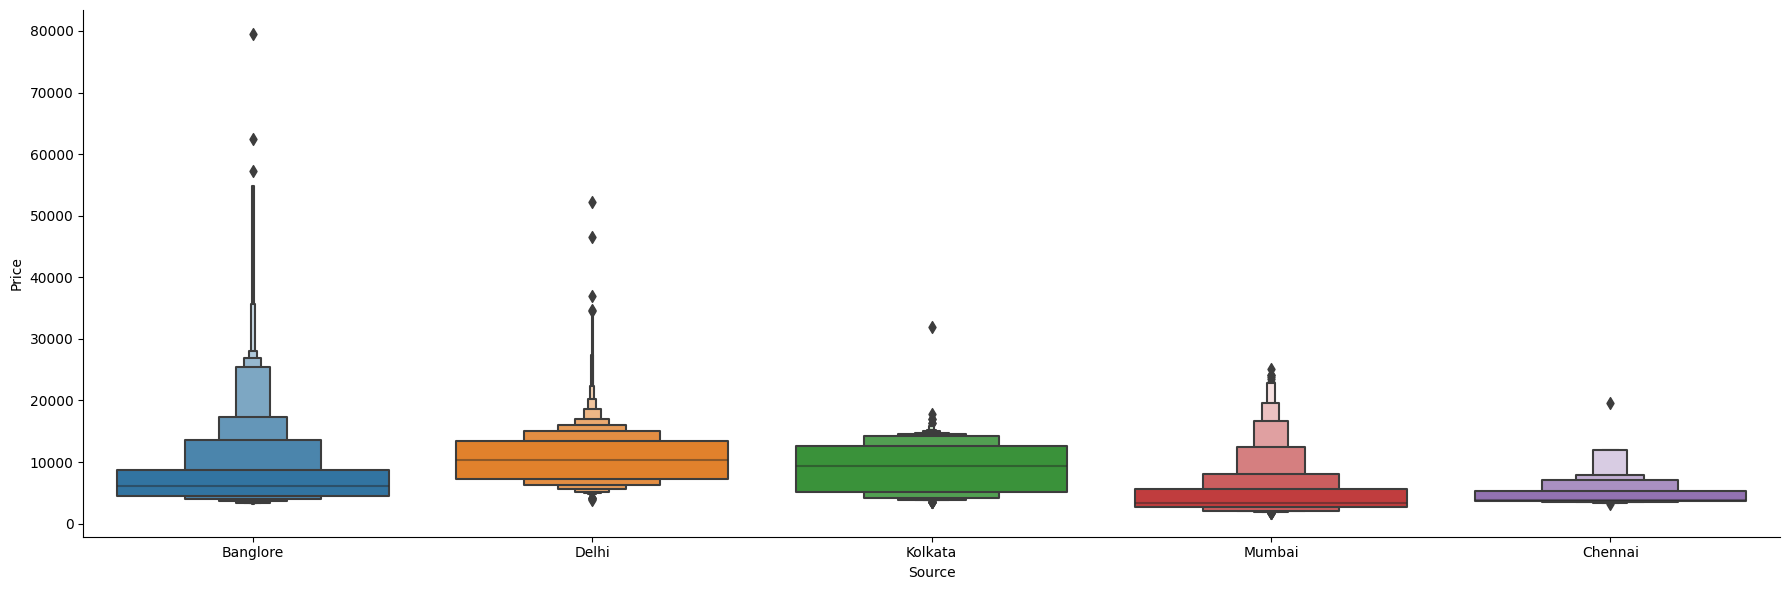

In [12]:
sns.catplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [13]:
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

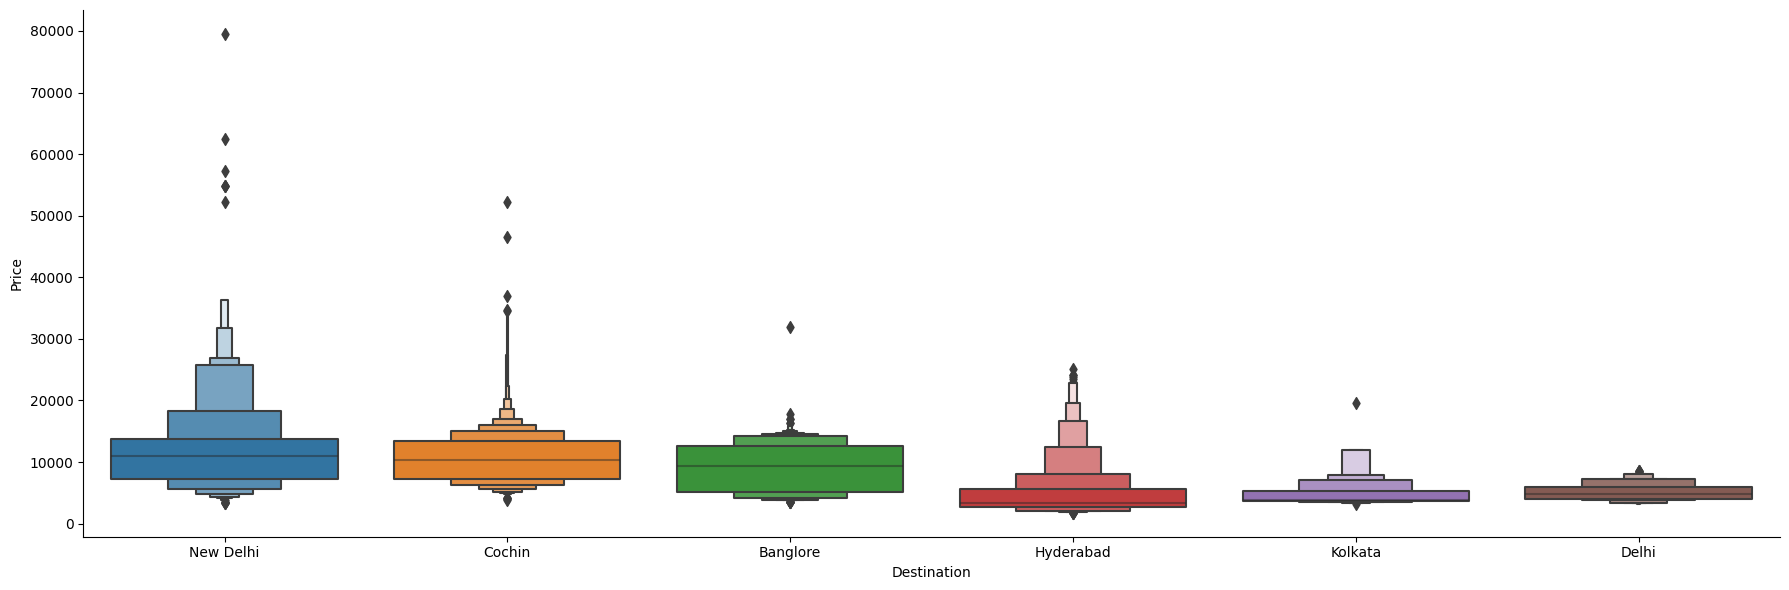

In [14]:
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [15]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [16]:
df_final['Date']=df_final['Date_of_Journey'].str.split('/').str[0]
df_final['Month']=df_final['Date_of_Journey'].str.split('/').str[1]
df_final['Year']=df_final['Date_of_Journey'].str.split('/').str[2]

In [17]:
df_final = df_final.drop(['Date_of_Journey'], axis=1)

In [18]:
df_final.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [19]:
df_final.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [20]:
df_final['Date'] = df_final['Date'].astype(int)
df_final['Month'] = df_final['Month'].astype(int)
df_final['Year'] = df_final['Year'].astype(int)

In [21]:
df_final.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
dtype: object

In [22]:
df_final.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [23]:
df_final['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

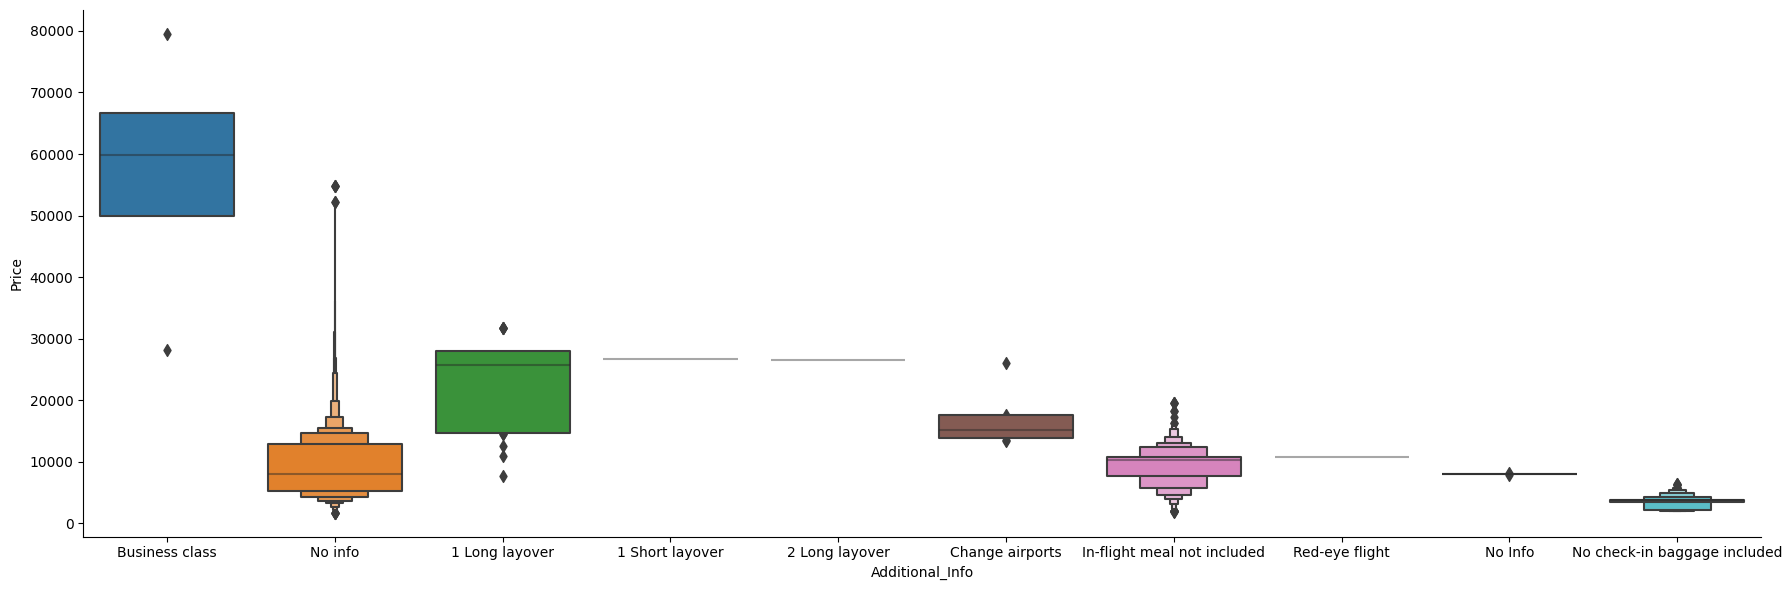

In [24]:
sns.catplot(y='Price',x='Additional_Info',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [25]:
df_final['Arrival_Time']=df_final['Arrival_Time'].str.split(' ').str[0]

In [26]:
df_final.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [27]:
df_final['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [28]:
df_final['Total_Stops'] = df_final['Total_Stops'].fillna('1 stop')
df_final['Total_Stops'].isnull().sum()

0

In [29]:
df_final['Total_Stops'] = df_final['Total_Stops'].replace('non-stop','0 stop')
df_final.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [30]:
df_final['Stop'] = df_final['Total_Stops'].str.split(' ').str[0]
df_final.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [31]:
df_final = df_final.drop(['Total_Stops'], axis=1)

In [32]:
df_final.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
Stop                object
dtype: object

In [33]:
df_final['Stop'] = df_final['Stop'].astype(int)

In [34]:
df_final.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
Stop                 int64
dtype: object

In [35]:
df_final['Arrival_Hour'] = df_final['Arrival_Time'].str.split(':').str[0]
df_final['Arrival_Minute'] = df_final['Arrival_Time'].str.split(':').str[1]

df_final['Arrival_Hour'] = df_final['Arrival_Hour'].astype(int)
df_final['Arrival_Minute'] = df_final['Arrival_Minute'].astype(int)

df_final.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [36]:
df_final = df_final.drop(['Arrival_Time'], axis=1)

In [37]:
df_final.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,24,3,2019,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [38]:
df_final['Dep_Hour'] = df_final['Dep_Time'].str.split(':').str[0]
df_final['Dep_Minute'] = df_final['Dep_Time'].str.split(':').str[1]

df_final['Dep_Hour'] = df_final['Dep_Hour'].astype(int)
df_final['Dep_Minute'] = df_final['Dep_Minute'].astype(int)

In [39]:
df_final = df_final.drop(['Dep_Time'], axis=1)

df_final.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


In [40]:
df_final['Route_1']= df_final['Route'].str.split('→ ').str[0]
df_final['Route_2']= df_final['Route'].str.split('→ ').str[1]
df_final['Route_3']= df_final['Route'].str.split('→ ').str[2]
df_final['Route_4']= df_final['Route'].str.split('→ ').str[3]
df_final['Route_5']= df_final['Route'].str.split('→ ').str[4]

In [41]:
df_final['Route_1'].fillna("None",inplace=True)
df_final['Route_2'].fillna("None",inplace=True)
df_final['Route_3'].fillna("None",inplace=True)
df_final['Route_4'].fillna("None",inplace=True)
df_final['Route_5'].fillna("None",inplace=True)

In [42]:
df_final.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [43]:
df_final=df_final.drop(['Route'],axis=1)
df_final=df_final.drop(['Duration'],axis=1)

df_final.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [44]:
df_final.isnull().sum()

Airline               0
Source                0
Destination           0
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Stop                  0
Arrival_Hour          0
Arrival_Minute        0
Dep_Hour              0
Dep_Minute            0
Route_1               0
Route_2               0
Route_3               0
Route_4               0
Route_5               0
dtype: int64

In [45]:
df_final['Price'].fillna((df_final['Price'].mean()), inplace=True)

In [46]:
# Using Label Encoder
le = LabelEncoder()

In [47]:
df_final['Airline'] = le.fit_transform(df_final['Airline'])
df_final['Source'] = le.fit_transform(df_final['Source'])
df_final['Destination'] = le.fit_transform(df_final['Destination'])
df_final['Additional_Info'] = le.fit_transform(df_final['Additional_Info'])
df_final['Route_1'] = le.fit_transform(df_final['Route_1'])
df_final['Route_2'] = le.fit_transform(df_final['Route_2'])
df_final['Route_3'] = le.fit_transform(df_final['Route_3'])
df_final['Route_4'] = le.fit_transform(df_final['Route_4'])
df_final['Route_5'] = le.fit_transform(df_final['Route_5'])

In [48]:
df_final.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,12,4


In [49]:
# Dropping Year column as it is one year data so value for year will be same
df_final = df_final.drop(['Year'], axis=1)
df_final.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,1,21,35,16,50,0,34,8,12,4


In [50]:
# Separate data into dependent and independent variable
X = df_final.drop(['Price'],axis=1)
y = df_final['Price']

In [51]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [52]:
# Lasso to perform regression analysis to find model for best fit
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [53]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [54]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [55]:
selected_features=X_train.columns[(model.get_support())]

In [56]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour', 'Dep_Minute',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [57]:
# These are selected features
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)

ExtraTreesRegressor()

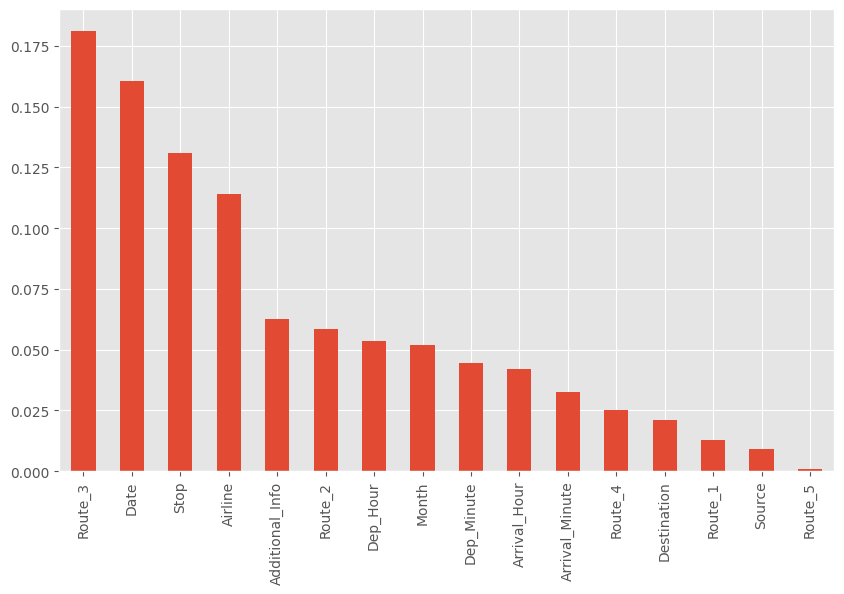

In [59]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
feature_importances = pd.Series(etr.feature_importances_, index=X.columns)
feature_importances.nlargest(35).plot(kind='bar')
plt.show()

In [60]:
# Importing our model
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
y_pred = reg_rf.predict(X_test)

In [62]:
reg_rf.score(X_train, y_train)

0.9472606461756387

In [63]:
reg_rf.score(X_test, y_test)

0.6134456175396119

<ipython-input-64-89ed51167e5e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


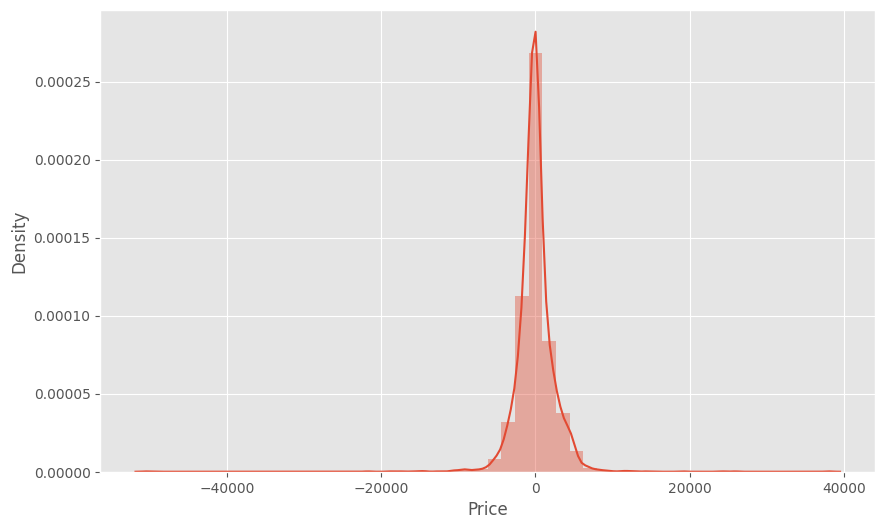

In [64]:
plt.style.use("ggplot")
plt.figure(figsize=(10,6))
sns.distplot(y_test-y_pred)
plt.show()

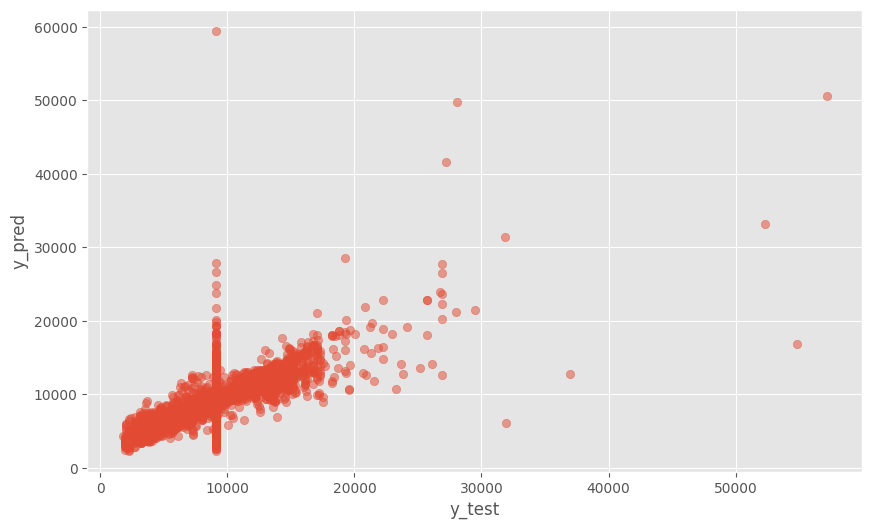

In [65]:
plt.figure(figsize=(10,6))
plt.style.use("ggplot")
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1534.74787939861
MSE: 6426774.37800017
RMSE: 2535.10835626412


In [67]:
metrics.r2_score(y_test, y_pred)

0.6134456175396119

In [69]:
# Hypertuning the model
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 7, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3, 5,8, 10]

In [70]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [71]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = param_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5,
                               verbose=2, random_state=42, n_jobs = 3)

In [72]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=3,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5, 8, 10],
                                        'min_samples_split': [2, 3, 5, 7, 10,
                                                              15, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [73]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [74]:
reg_rf = RandomForestRegressor(n_estimators= 700,
 min_samples_split=3,
 min_samples_leaf= 1,
 max_features='sqrt',
 max_depth= 15)

In [75]:
reg_rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=3,
                      n_estimators=700)

In [76]:
ypred1= reg_rf.predict(X_test)

In [77]:
ypred1

array([10236.34992361,  9049.37961438,  8654.16746479, ...,
        4474.48119478,  7950.88753848, 10010.96805661])

<ipython-input-79-aff2a31cacd4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-ypred1)


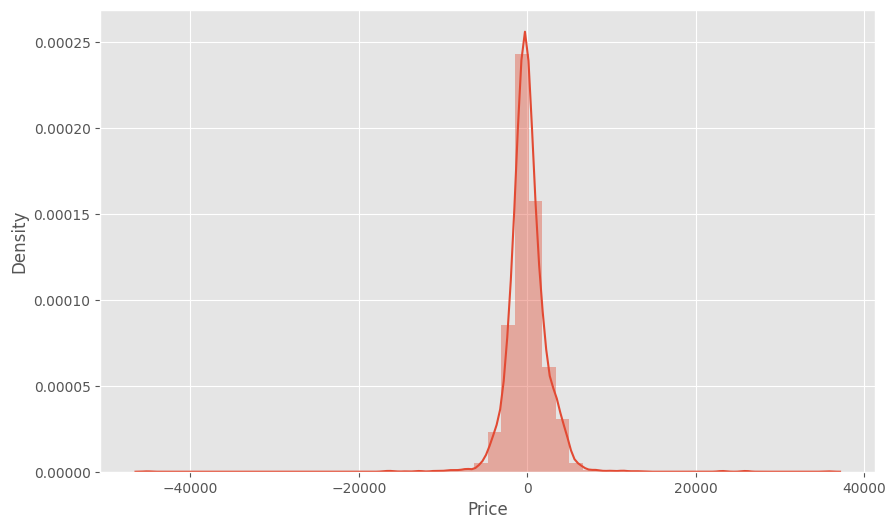

In [79]:
plt.style.use("ggplot")
plt.figure(figsize=(10,6))
sns.distplot(y_test-ypred1)
plt.show()

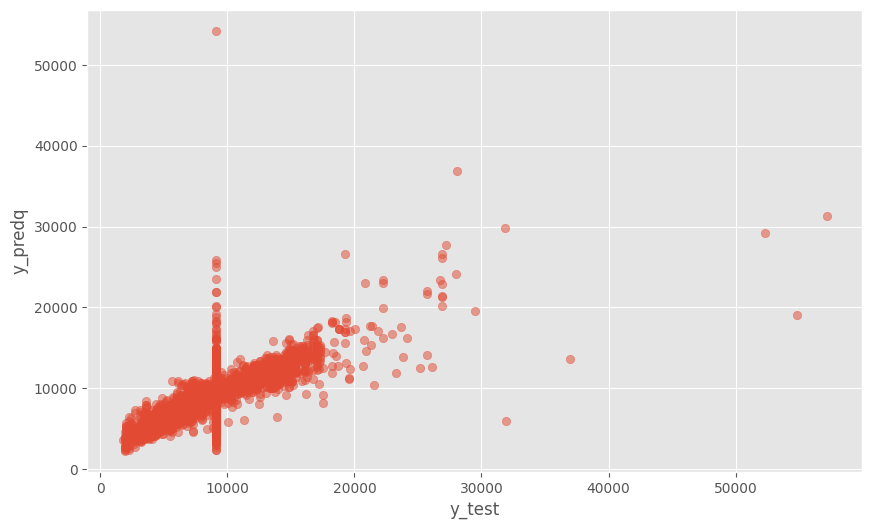

In [81]:
plt.figure(figsize=(10,6))
plt.style.use("ggplot")
plt.scatter(y_test, ypred1, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_predq")
plt.show()

In [82]:
print('MAE:', metrics.mean_absolute_error(y_test, ypred1))
print('MSE:', metrics.mean_squared_error(y_test, ypred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred1)))

MAE: 1556.1194177027385
MSE: 6065758.380627622
RMSE: 2462.8760384208585


In [83]:
metrics.r2_score(y_test, ypred1)

0.6351598255878009